In [11]:
import sys
import os
import torch
import networkx as nx
import pandas as pd

src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

from transformers import pipeline
from network_graph.graph_handling import add_node_attributes, export_graph_to_csv
from network_graph.community_detection import detect_communities_louvain
from network_graph.visualisation import visualise_graph


src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

In [12]:
file_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\raw_data\reddit_data_raw.csv'
df = pd.read_csv(file_path)
df.head()

,user,replying_to,comment,timestamp
0,o_portista,1DMod,"Time flies, It's been over a day now with Liam...",2024-10-18 17:03:30
1,EternalOverthinker,1DMod,Originally was a post but thought I would shar...,2024-10-18 17:03:30
2,somyoshino,1DMod,"I originally made this as a post, but here it ...",2024-10-18 17:03:30
3,dagummiie,1DMod,The last few days have been nothing short of a...,2024-10-18 17:03:30
4,Plenty_Bar7439,1DMod,"Anyone annoyed by the fact that Liam was ""conv...",2024-10-18 17:03:30


In [13]:
device = 0 if torch.cuda.is_available() else -1

if device == 0:
    print('Using GPU')
else:
    print('Using CPU')

pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", device=device)
pipe.save_pretrained(os.path.join('..', 'src', 'Sentiment', 'sentiment_model'))

Using GPU


In [14]:
def classify_comment(comment):
    truncated_comment = comment[:512]
    result = pipe(truncated_comment)

    label = result[0]['label']
    return 1 if label == 'POSITIVE' else -1


df['label'] = df['comment'].apply(classify_comment)

In [15]:
folder_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\labelled_data'
csv_file_path = os.path.join(folder_path, 'reddit_data_labelled.csv')

df.to_csv(csv_file_path, index=False)

In [16]:
edge_list_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\raw_graph\edges_list.csv'
edges_df = pd.read_csv(edge_list_path)

G = nx.from_pandas_edgelist(edges_df, source='source', target='target')

In [17]:
G = add_node_attributes(G, 'user', 'label', df)
G = detect_communities_louvain(G)


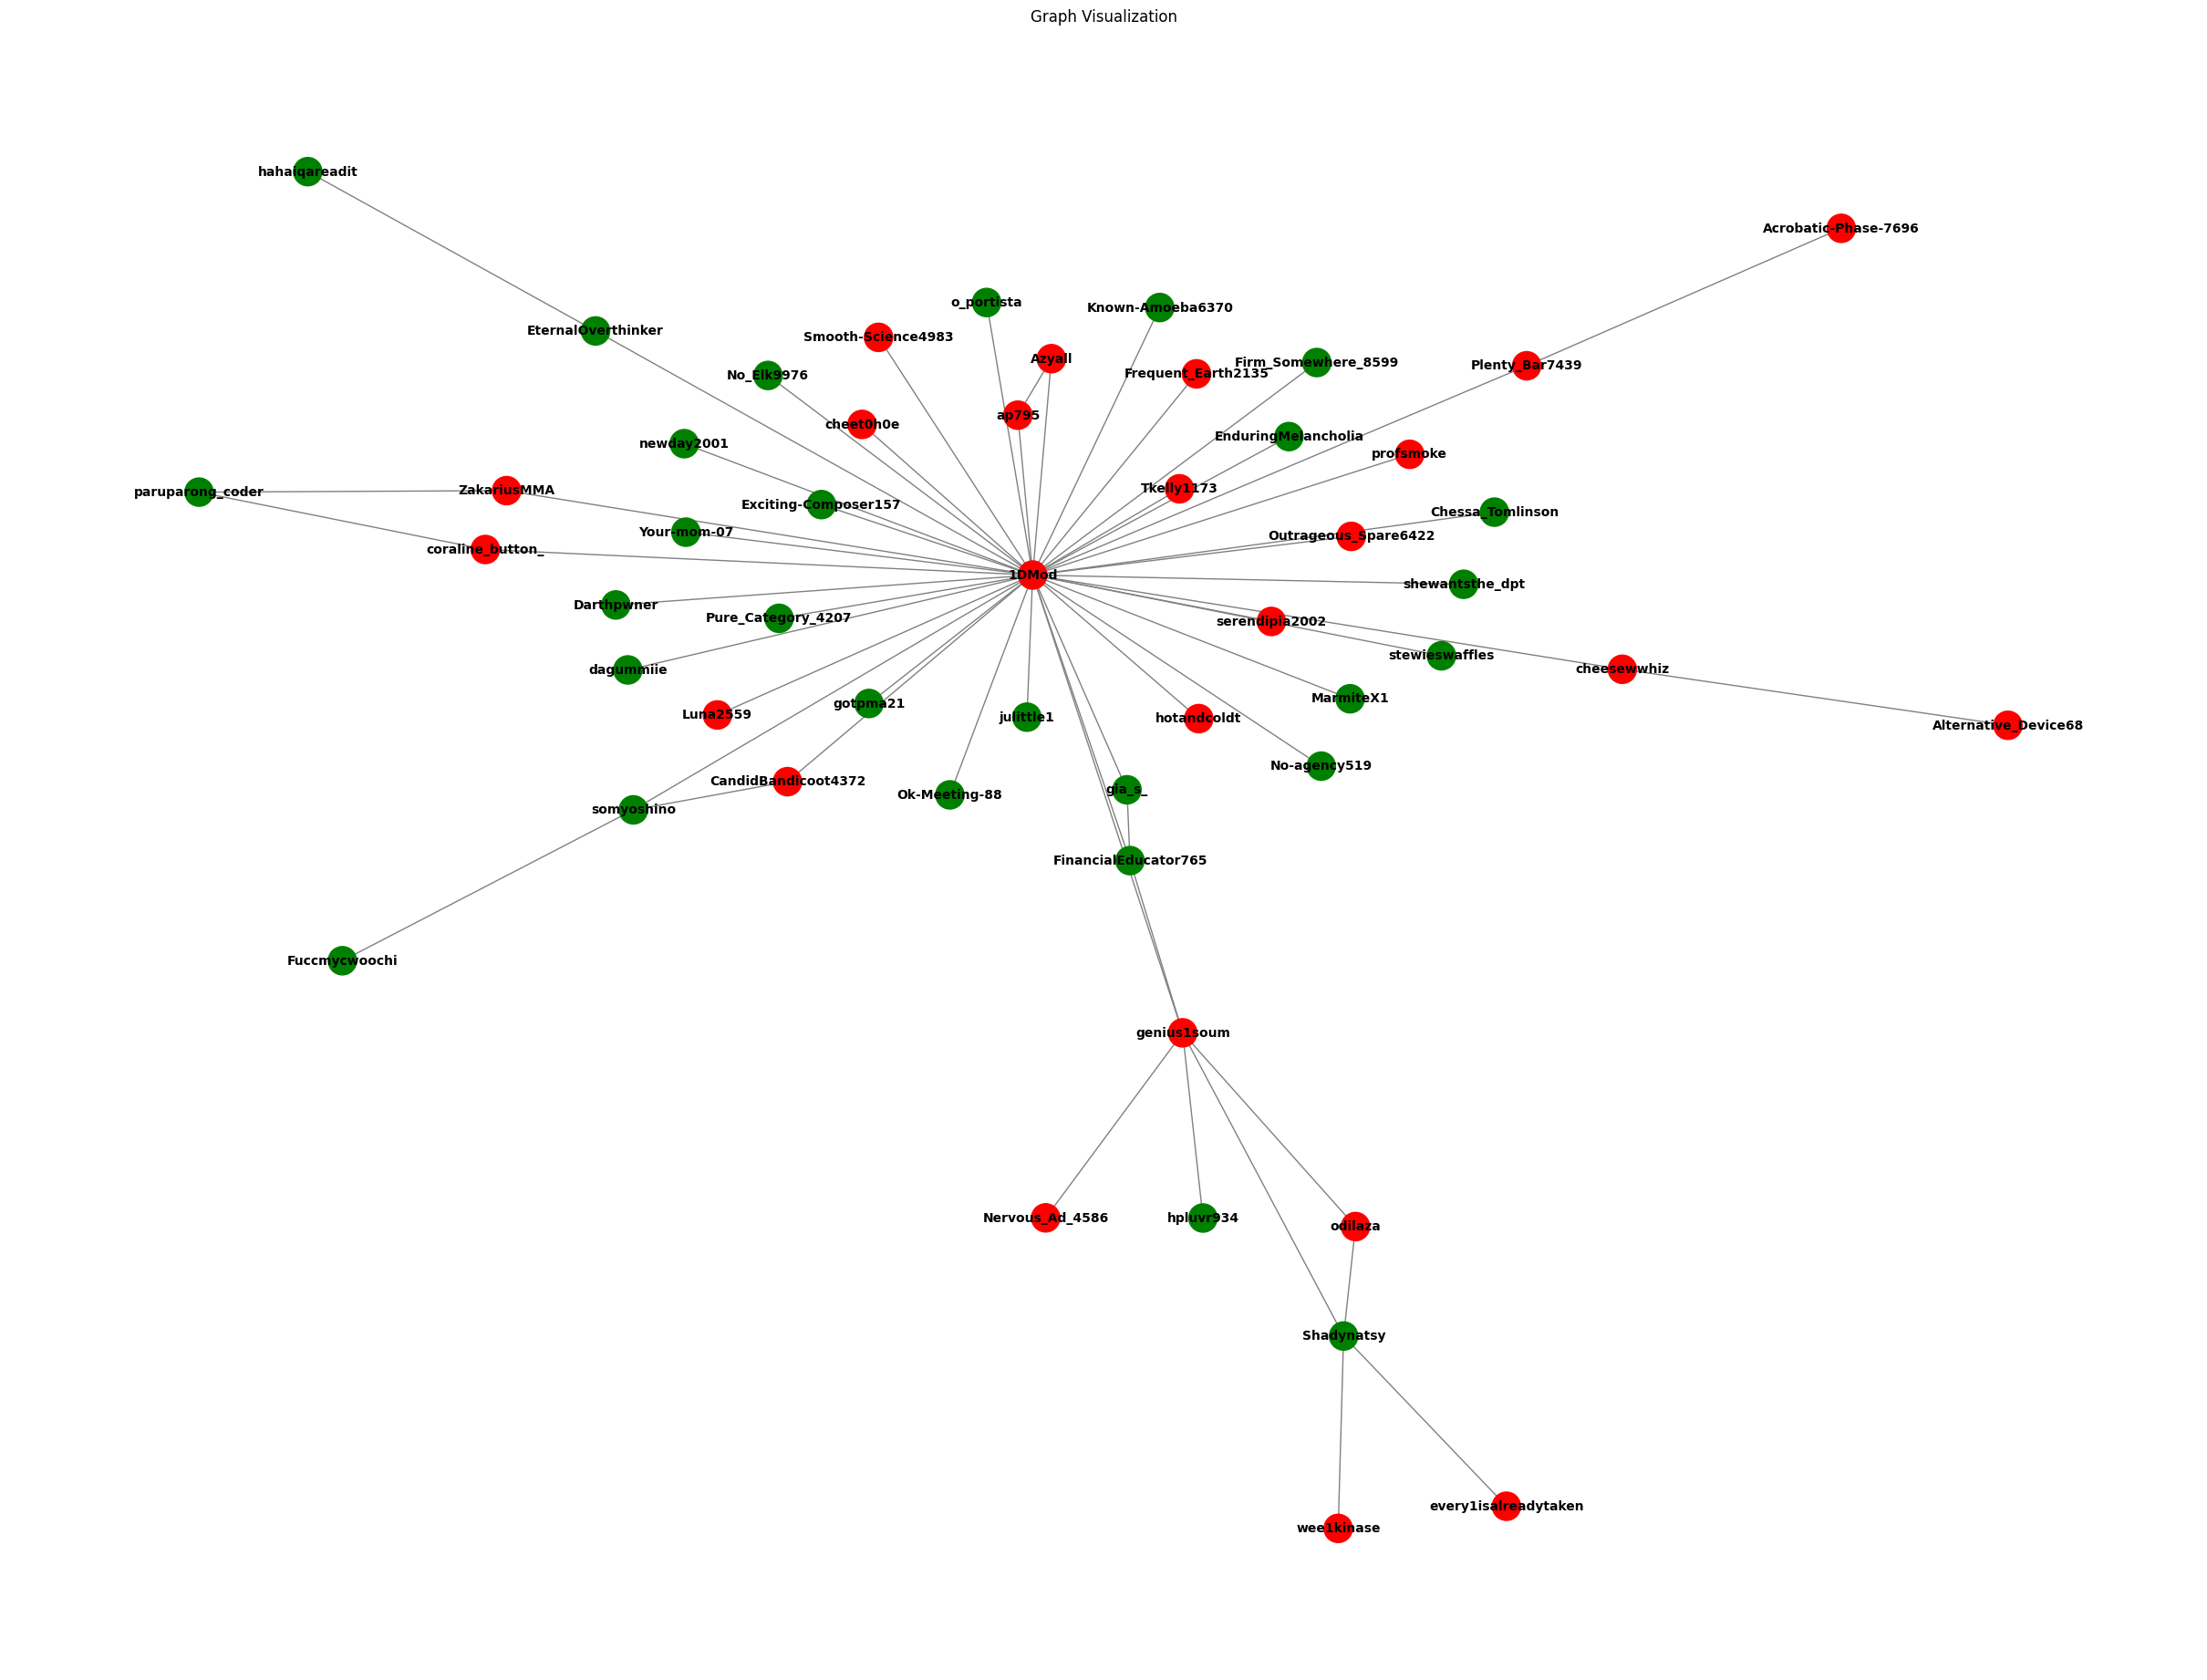

In [18]:
visualise_graph(G, color_by='label')

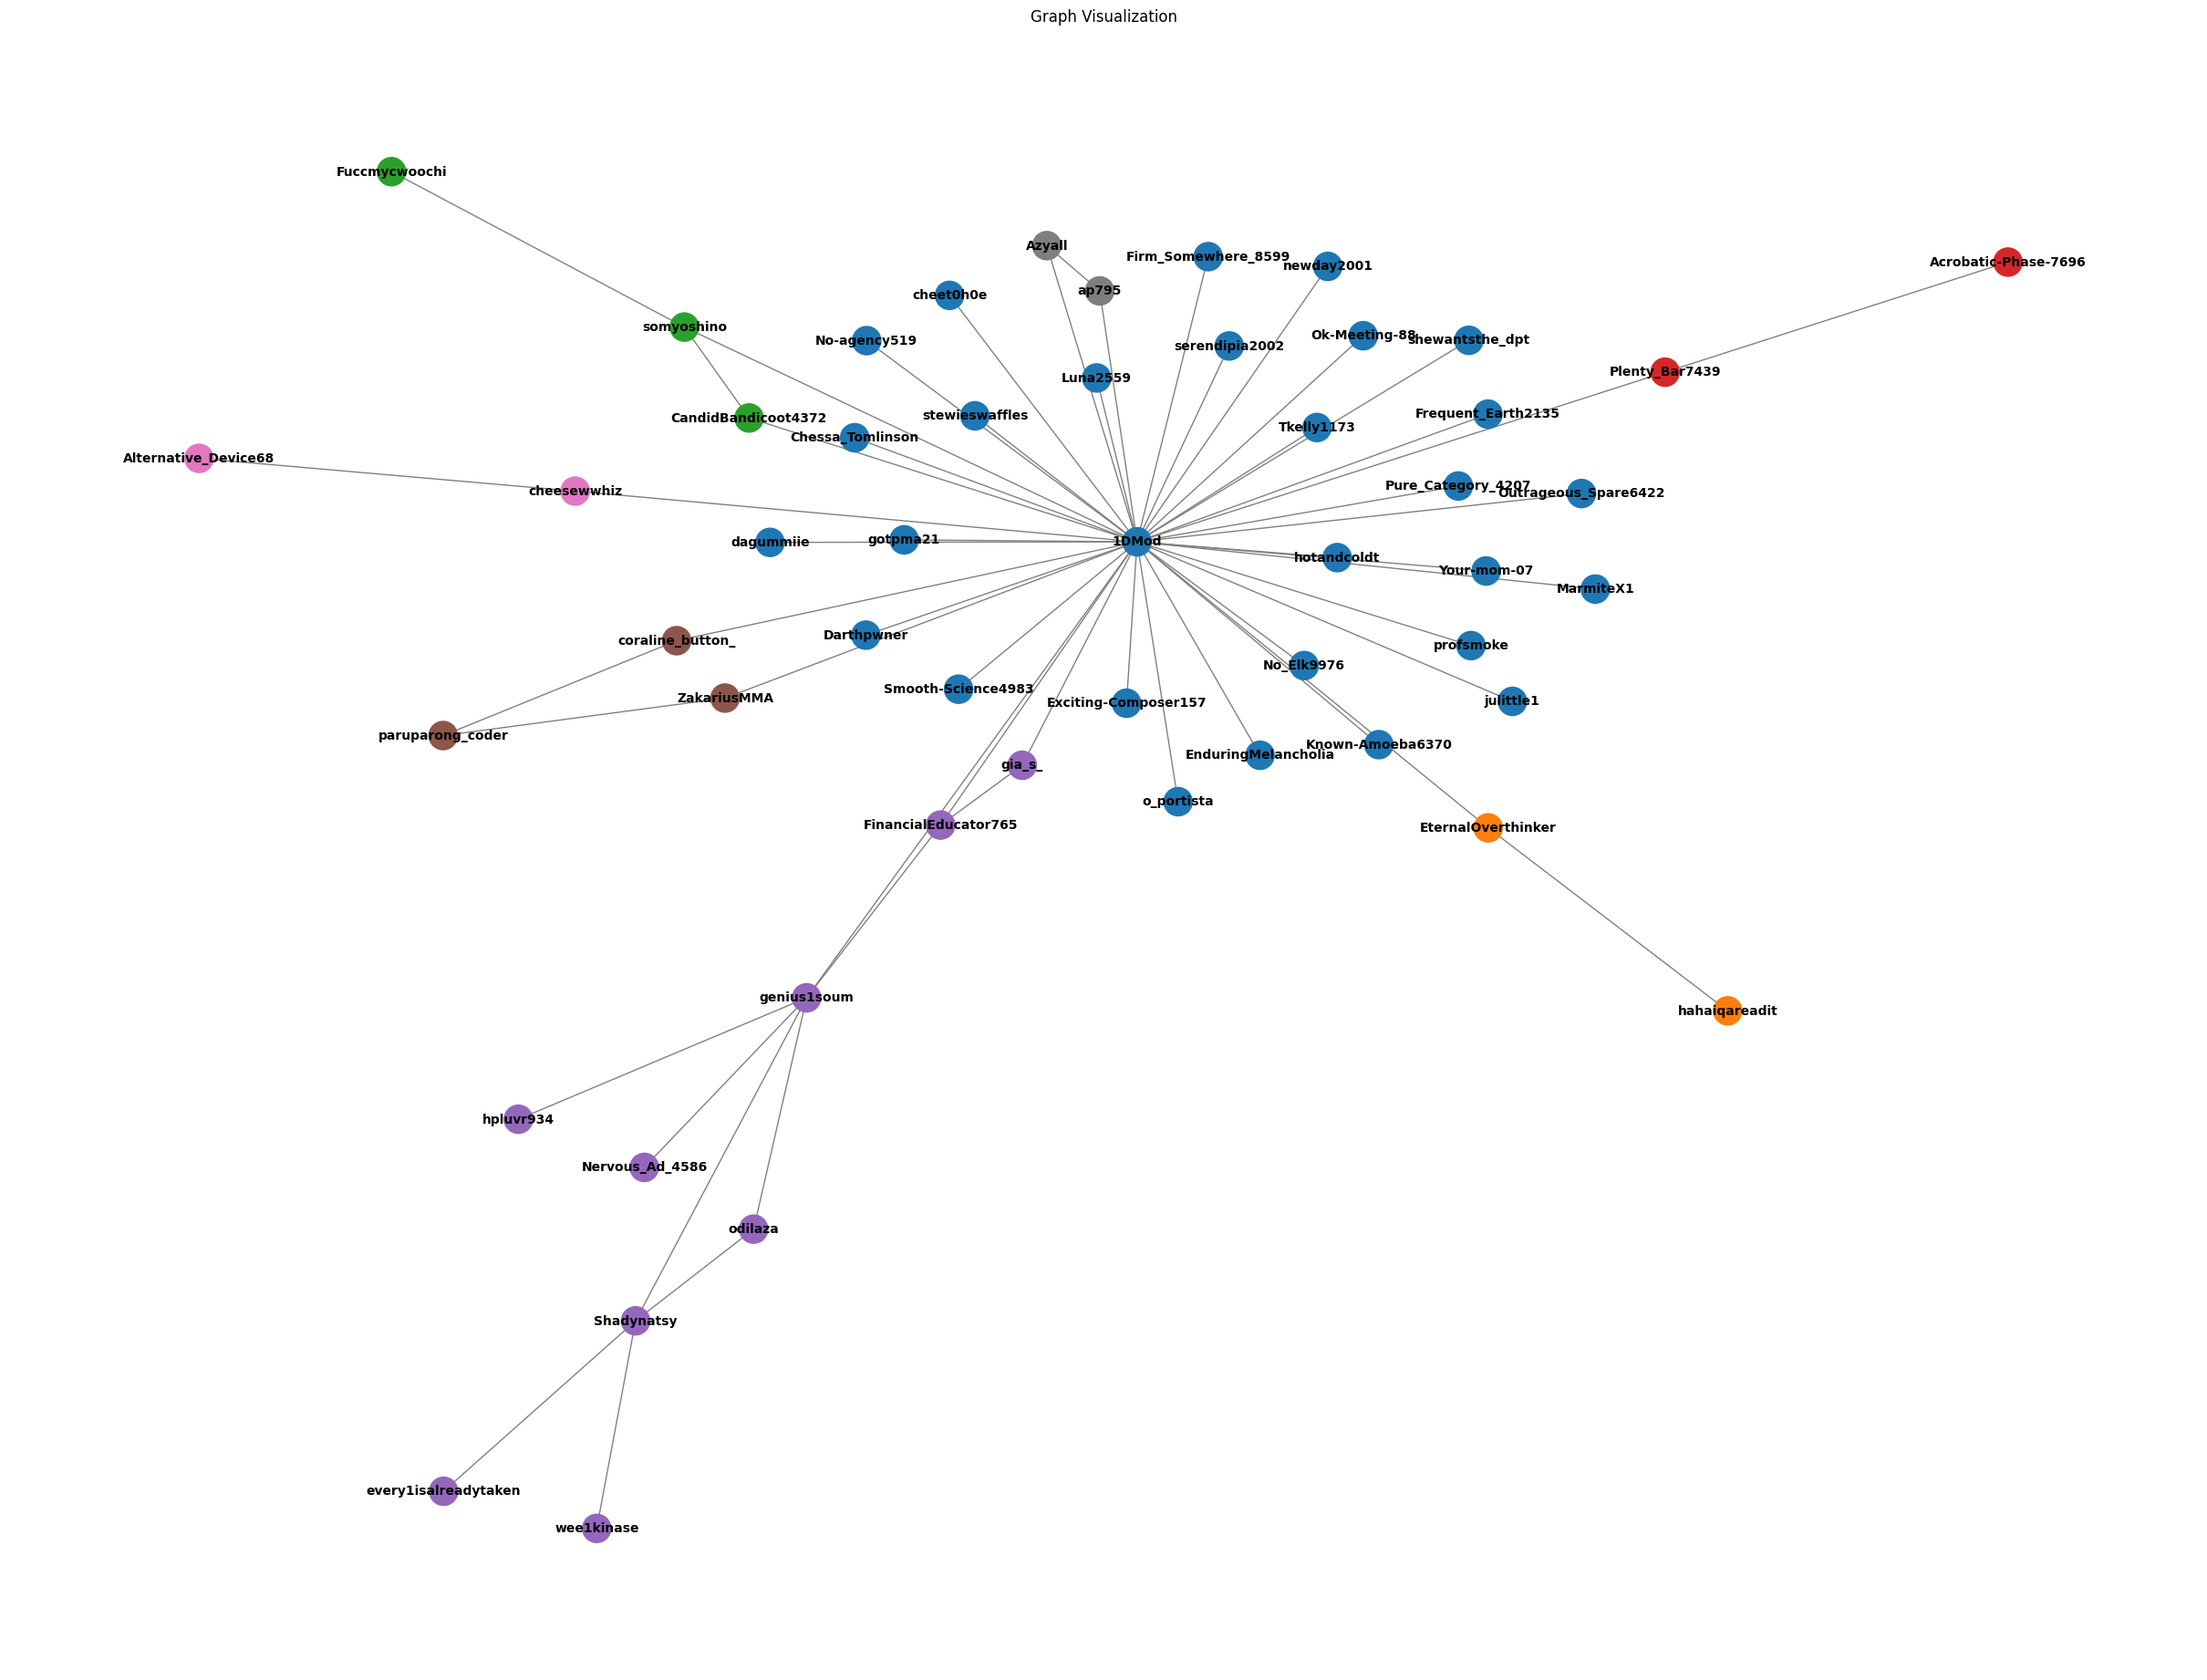

In [19]:
visualise_graph(G, color_by='community')

In [20]:
folder_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\labelled_graph'


node_csv_path = os.path.join(folder_path, 'nodes_list_labelled.csv')
edge_csv_path = os.path.join(folder_path, 'edges_list_labelled.csv')

export_graph_to_csv(G, node_csv_path, edge_csv_path)

Graph exported: C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\labelled_graph\nodes_list_labelled.csv (nodes), C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\labelled_graph\edges_list_labelled.csv (edges)
